First 5 rows of the dataset:
  first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3 

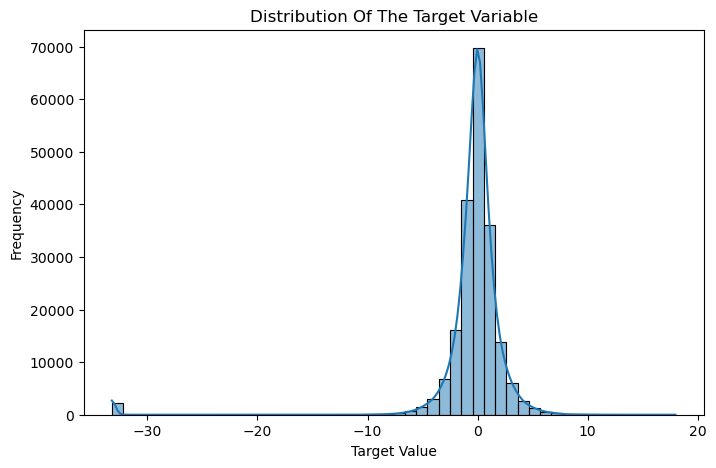


Target Variable Summary Statistics:
count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068

Correlation with 'target' Variable (Numerical Features Only):
 target       1.000000
feature_2   -0.006242
feature_3   -0.008125
feature_1   -0.014251


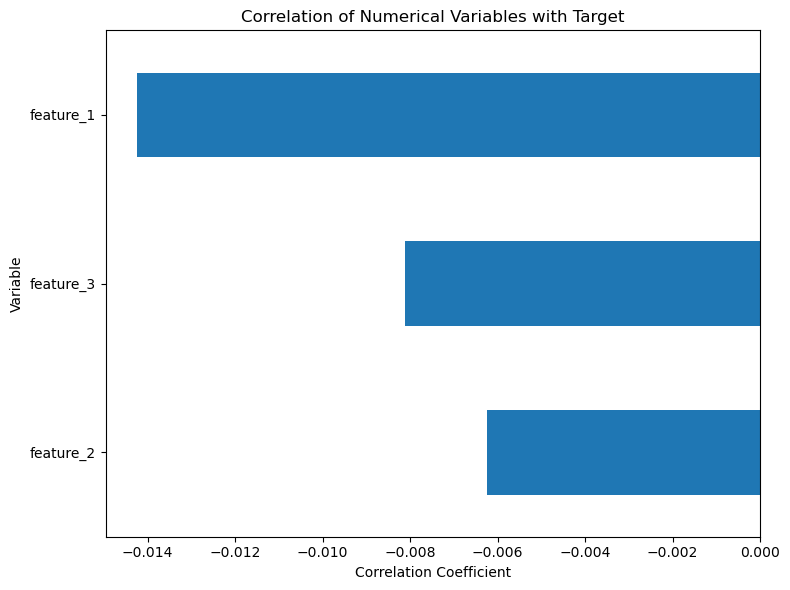


Visualizing Numerical Features vs. Target:


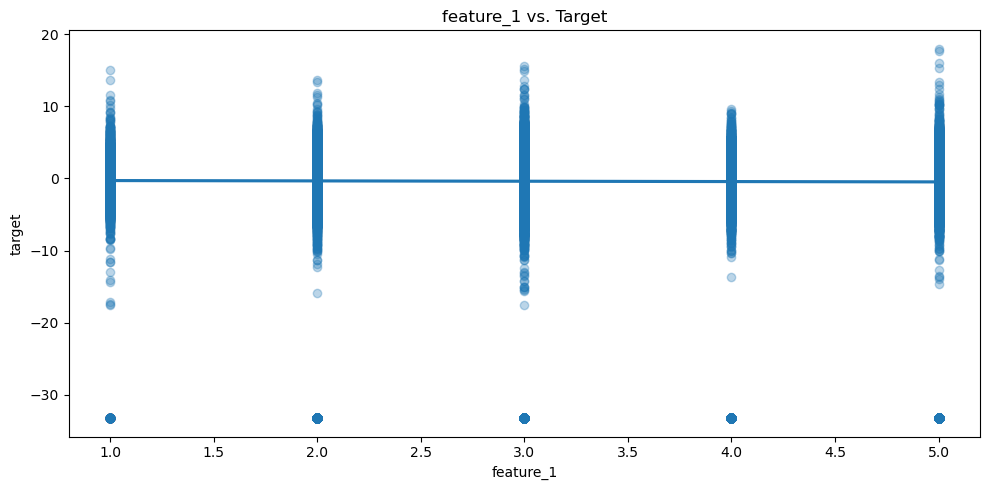

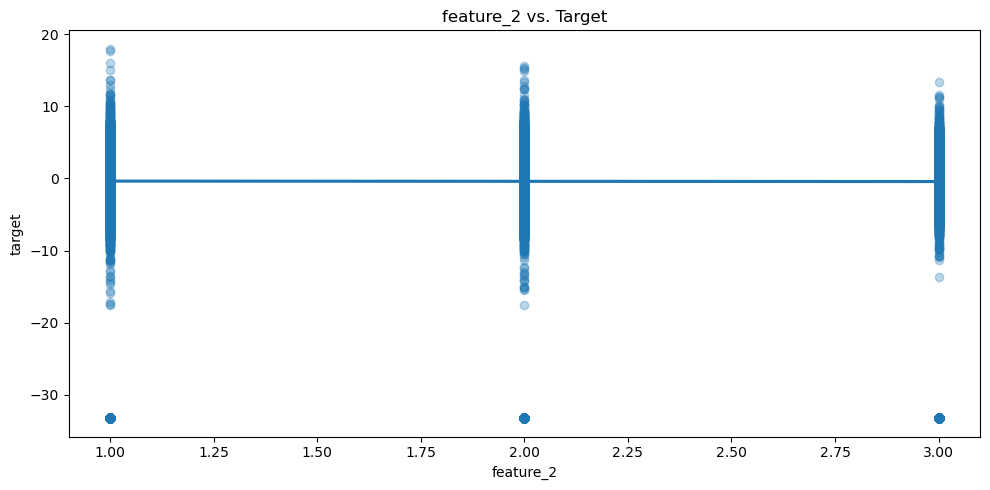

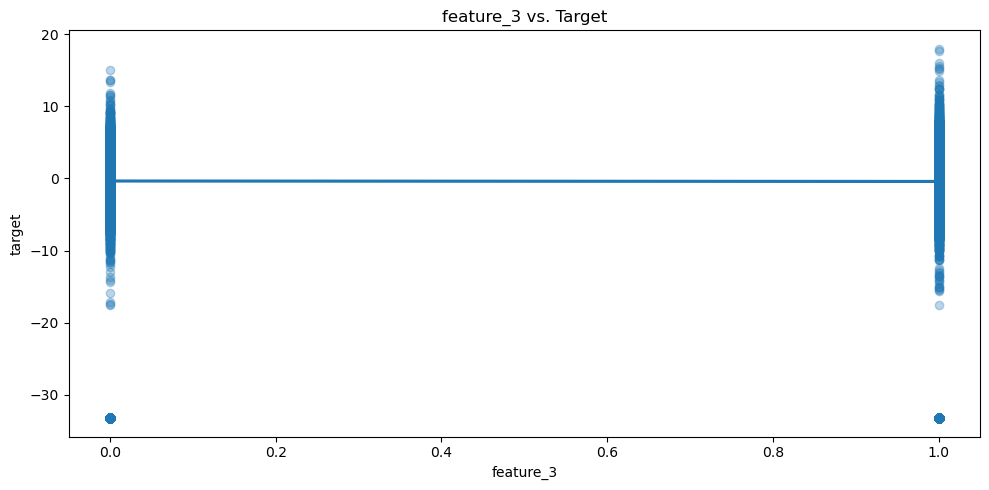


Visualizing Categorical Features vs. Target (Mean Target Value):


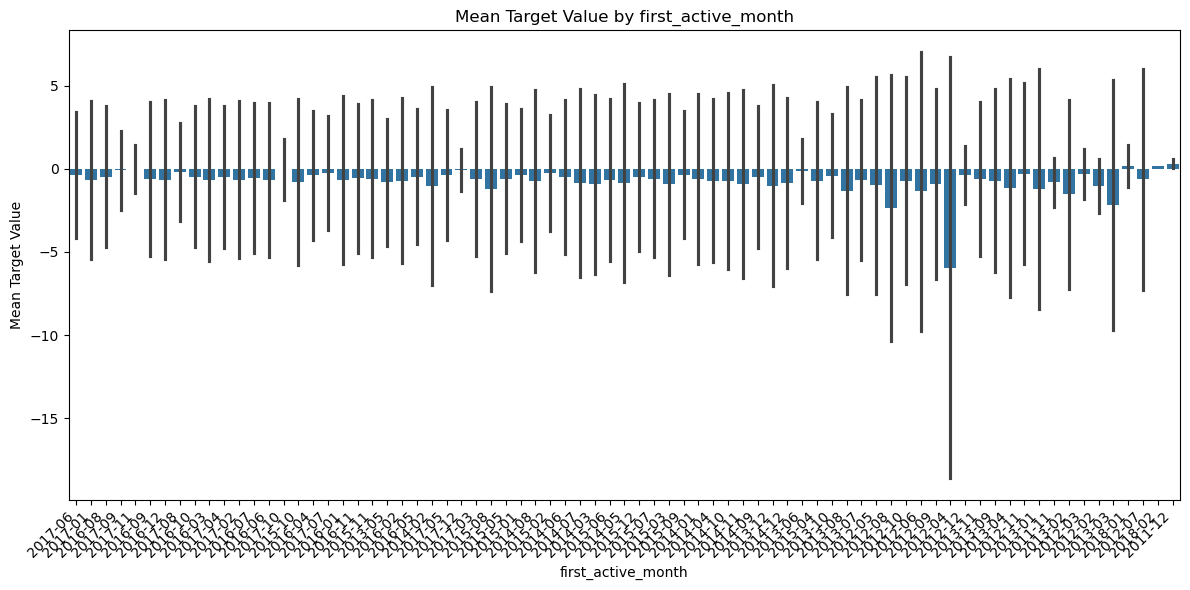

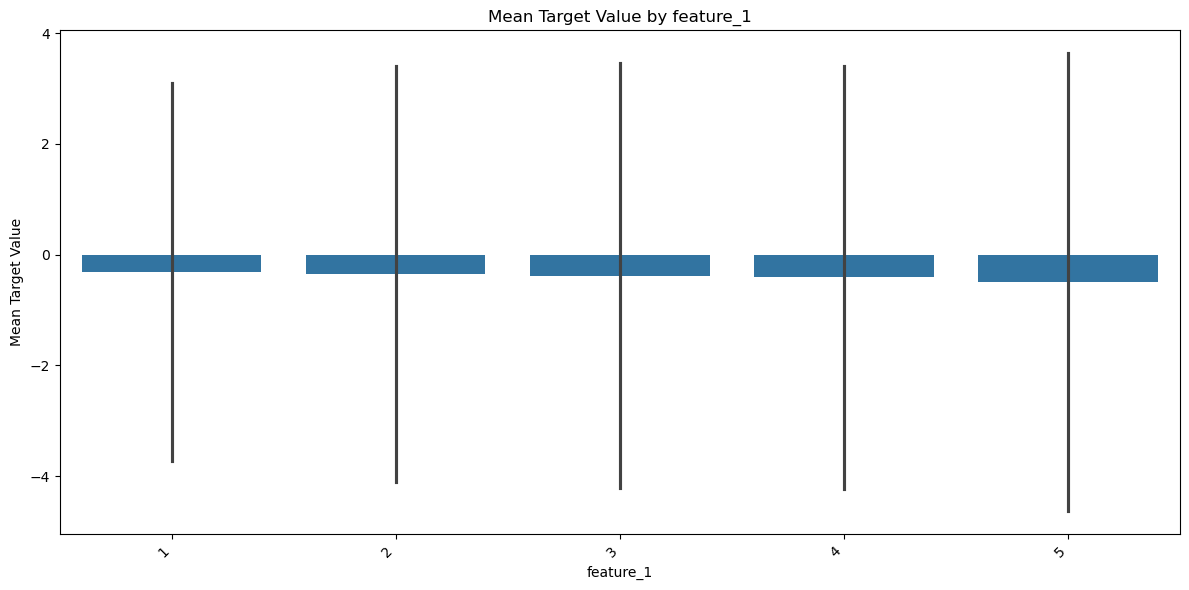

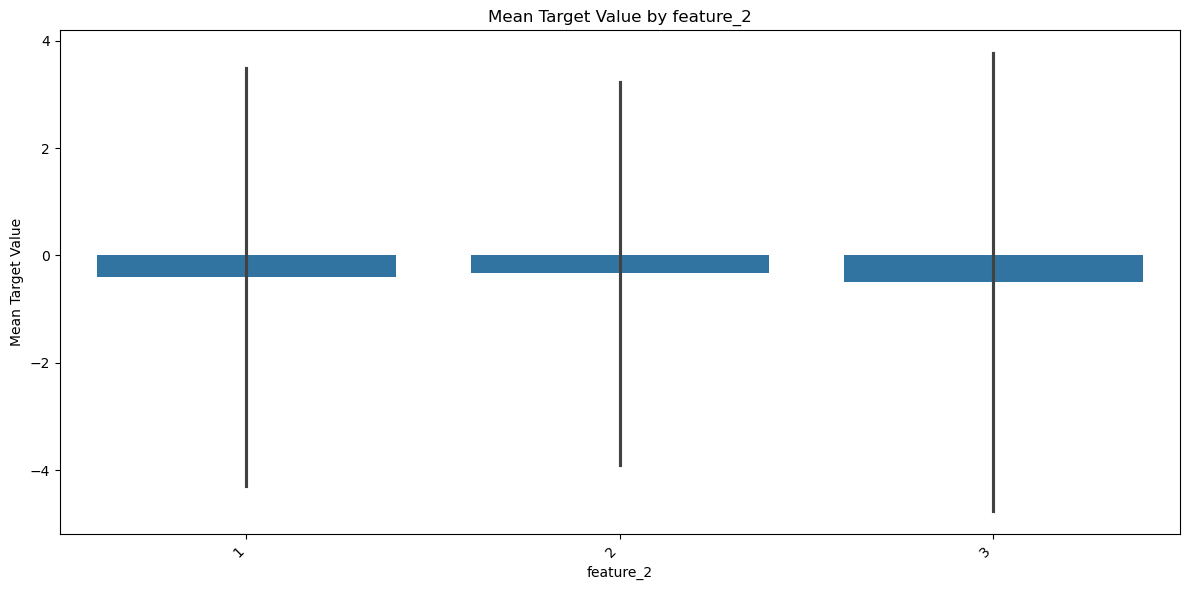

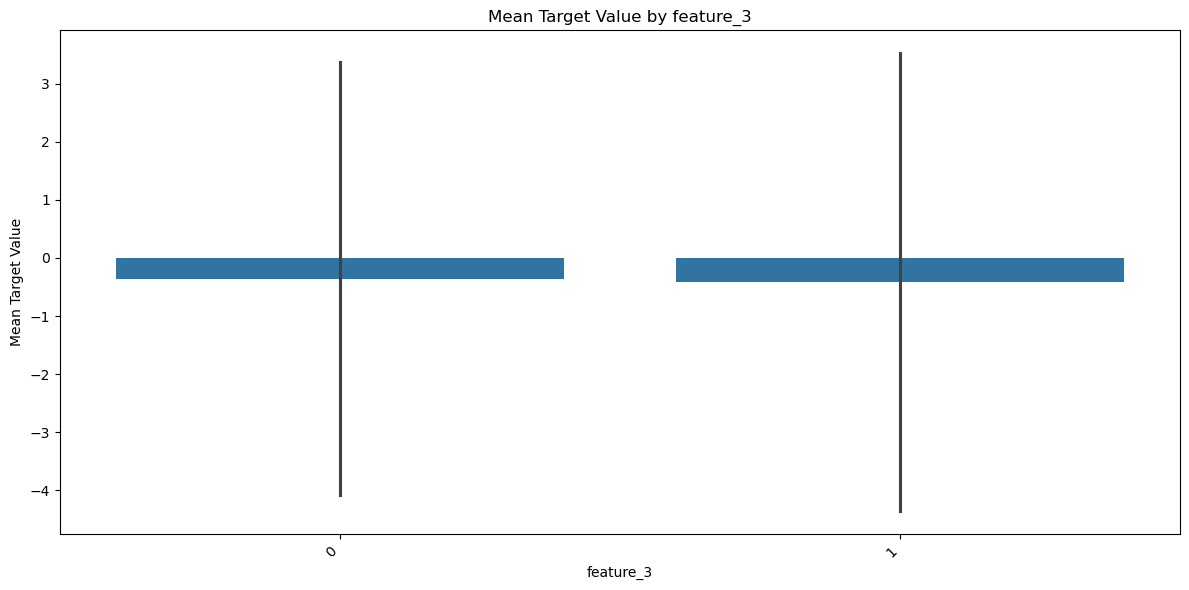

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and print basic information

df = pd.read_csv("data/train.csv")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataFrame Info:")
df.info()
print("\nDataFrame Columns:")
print(df.columns.tolist()) # Print all column names to verify

# --- EDA ---

# Evaluating the 'target' variable. It is a continuous variable, using (histogram/kde) 
plt.figure(figsize = (8, 5))
sns.histplot(df['target'], kde = True, bins = 50)
plt.title('Distribution Of The Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()


# Summary statistics for the target variable.
print("\nTarget Variable Summary Statistics:")
print(df['target'].describe().to_string())

# Find Correlation between 'target' and numerical variables 'feature_1', 'feature_2', and 'feature_3' 
# 'first_active_month' is a categorical variable, could be converted to numerical (e.g., month number)
# 'card_id' is an identifier.
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns
correlation_matrix_numerical = df[numerical_cols].corr()

# Check if 'target' exists in the correlation matrix columns
if 'target' in correlation_matrix_numerical.columns:
    target_correlation_numerical = correlation_matrix_numerical['target'].sort_values(ascending=False)
    print("\nCorrelation with 'target' Variable (Numerical Features Only):\n", target_correlation_numerical.to_string())

    # Visualize numerical correlations
    plt.figure(figsize = (8, 6)) 
    # Drop 'target' itself from the plot as its correlation with itself is always 1
    target_correlation_numerical.drop('target', errors = 'ignore').plot(kind = 'barh')
    plt.title('Correlation of Numerical Variables with Target')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Variable')
    plt.tight_layout()
    plt.show()
else:
    print("\n'target' column not found in numerical columns for correlation analysis.")


# Plotting Numerical Variables against 'target'
selected_numerical_vars = ['feature_1', 'feature_2', 'feature_3']

print("\nVisualizing Numerical Features vs. Target:")

for var in selected_numerical_vars:
    if var in df.columns and pd.api.types.is_numeric_dtype(df[var]):
        plt.figure(figsize = (10, 5))
        # Use a scatter plot or regression plot for continuous target vs. numerical feature
        # Boxplot is typically for categorical x vs. numerical y.
        # For continuous target vs. numerical feature, a scatter plot with a regression line is good.
        sns.regplot(x = var, y = 'target', data = df, scatter_kws = {'alpha':0.3})
        plt.title(f'{var} vs. Target')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{var}' not found or is not numerical. Skipping plot.")


# Plotting Categorical Variables against 'target'
selected_categorical_vars = ['first_active_month', 'feature_1', 'feature_2', 'feature_3'] 

print("\nVisualizing Categorical Features vs. Target (Mean Target Value):")

for var in selected_categorical_vars:
    if var in df.columns:
        plt.figure(figsize = (12, 6))
        sns.barplot(x = var, y = 'target', data = df, errorbar = 'sd') 
        plt.title(f'Mean Target Value by {var}')
        plt.xlabel(var)
        plt.ylabel('Mean Target Value')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{var}' not found. Skipping plot.")

